<a href="https://colab.research.google.com/github/trista-paul/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [30]:
import pandas as pd
attributes = ['age at op', 'op year', 'nodes', 'survival']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=attributes)
def survivalconversion (df):
    if df['survival'] == 1:
        return 0
    elif df['survival'] == 2:
        return 1
df['survival']=df.apply(survivalconversion,axis=1)
df.head(5)
df.shape #(306, 4) #consistent with UCI
df.isnull().sum() #no NaNs
pd.set_option('display.max_rows', 306)
#print(df) #no strings/placeholders
df.head(5)

,age at op,op year,nodes,survival
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [42]:
print(df.describe())
print(df.corr())
#nodes has the highest coorelation with survival
#operation year appears the most irrelevant

        age at op     op year       nodes    survival
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    0.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    0.000000
25%     44.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    0.000000
75%     60.750000   65.750000    4.000000    1.000000
max     83.000000   69.000000   52.000000    1.000000
           age at op   op year     nodes  survival
age at op   1.000000  0.089529 -0.063176  0.067950
op year     0.089529  1.000000 -0.003764 -0.004768
nodes      -0.063176 -0.003764  1.000000  0.286768
survival    0.067950 -0.004768  0.286768  1.000000


survival               0         1
age at op                         
(29.947, 40.6]  0.173333  0.049383
(40.6, 51.2]    0.302222  0.382716
(51.2, 61.8]    0.306667  0.333333
(61.8, 72.4]    0.191111  0.197531
(72.4, 83.0]    0.026667  0.037037
AxesSubplot(0.125,0.125;0.775x0.755)
survival               0         1
op year                           
(57.989, 60.2]  0.293333  0.308642
(60.2, 62.4]    0.173333  0.123457
(62.4, 64.6]    0.200000  0.197531
(64.6, 66.8]    0.164444  0.234568
(66.8, 69.0]    0.168889  0.135802
AxesSubplot(0.125,0.125;0.775x0.755)
survival               0         1
nodes                             
(-0.052, 10.4]  0.924444  0.716049
(10.4, 20.8]    0.048889  0.185185
(20.8, 31.2]    0.022222  0.074074
(31.2, 41.6]    0.000000  0.012346
(41.6, 52.0]    0.004444  0.012346
AxesSubplot(0.125,0.125;0.775x0.755)


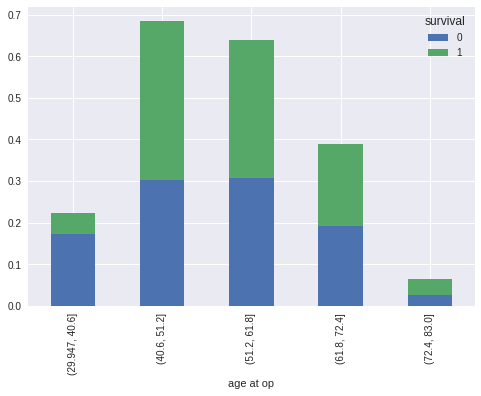

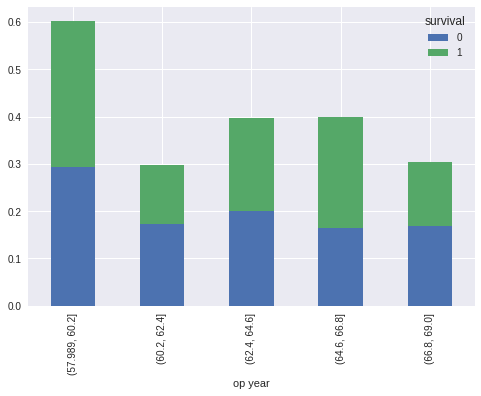

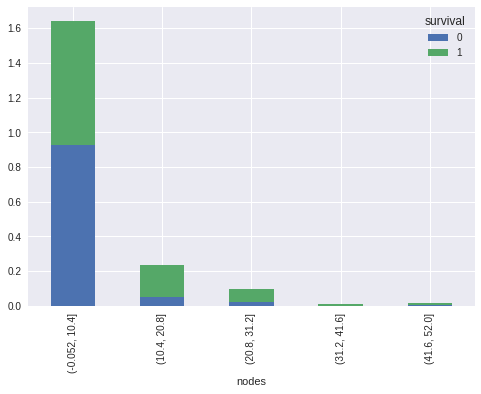

In [79]:
age = pd.cut(df['age at op'], 5)
nodes = pd.cut(df['nodes'], 5)
year = pd.cut(df['op year'], 5)
survival = df['survival']

#simple ct of survival and age
ctage = pd.crosstab(age, survival, normalize='columns')
print(ctage)
print(ctage.plot(kind='bar', stacked=True))
#there appears to be a normal distribution
#overall youre less likely to survive with age
#except for possible outliers in the first group

#simple ct of survival and year
ctyear = pd.crosstab(year, survival, normalize='columns')
print(ctyear)
print(ctyear.plot(kind='bar', stacked=True))
#vaguely right tailed?
#still appears unrelated - goes up and down each bin


#simple ct of survival and num nodes
ctnodes = pd.crosstab(nodes, survival, normalize='columns')
print(ctnodes)
print(ctnodes.plot(kind='bar', stacked=True))
#very positively related - the more nodes the lower probability of death

nodes           (-0.052, 10.4]  (10.4, 20.8]  (20.8, 31.2]  (31.2, 41.6]  \
age at op                                                                  
(29.947, 40.6]        0.142857      0.115385      0.181818           0.0   
(40.6, 51.2]          0.319549      0.423077      0.181818           0.0   
(51.2, 61.8]          0.312030      0.269231      0.363636           1.0   
(61.8, 72.4]          0.191729      0.192308      0.272727           0.0   
(72.4, 83.0]          0.033835      0.000000      0.000000           0.0   

nodes           (41.6, 52.0]  
age at op                     
(29.947, 40.6]           0.0  
(40.6, 51.2]             0.5  
(51.2, 61.8]             0.5  
(61.8, 72.4]             0.0  
(72.4, 83.0]             0.0  
AxesSubplot(0.125,0.125;0.775x0.755)


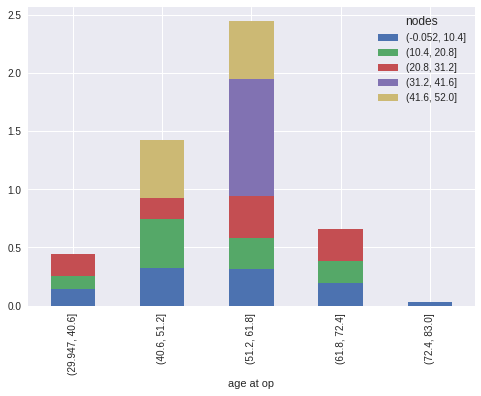

In [77]:
#simple ct of age and num nodes
ct1 = pd.crosstab(age, nodes, normalize='columns')
print(ct1)
print(ct1.plot(kind='bar', stacked=True))
#same pattern as age/survival

AxesSubplot(0.125,0.125;0.775x0.755)


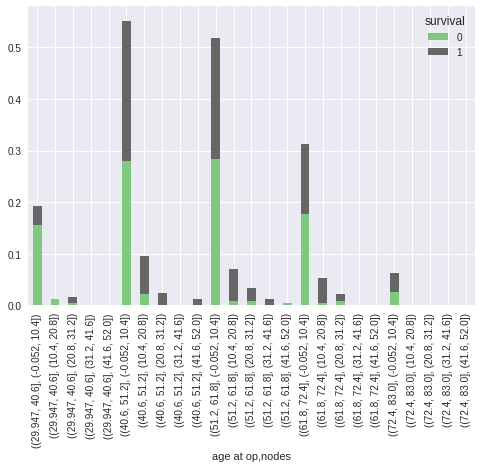

In [76]:
ctlarge = pd.crosstab([age, nodes], survival, normalize= 'columns')
print(ctlarge.plot(kind='bar', stacked=True, colormap='Accent'))

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
**Number of positive axillary nodes is highly coorelated with survival - even by 31 nodes the probability of a fatality is near nonexistant. This relationship has by far the highest coorelation at around 29% (compared to 7% for age and sub 1% for operation year).**
- What is at least one feature that looks to have a negative relationship with survival? **Age, but only after 40.6 years when it inexplicably jumps in probability of survivability.**

- How are those two features related with each other, and what might that mean? **when age and nodes are crosstabulated the graph resembles the crosstab of age and survival -and they are about 6% negatively coorelated in corr(). Older people may be less likely to survive because they're less likely to have a high number of axillary nodes.**

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.